Hypotesis: "Books with more reviews have lower ratings because have been read by more general public instead of only those people actually interested to the book"

In [9]:
from pymongo import MongoClient
import matplotlib.pyplot as plt

import pandas as pd

from IPython.display import display

# Hypotesis test
from scipy.stats import pearsonr
import numpy as np

In [2]:
client = MongoClient("mongodb://localhost:27017/")
db = client["amazon_reviews"]
collection = db["books"]

cursor = collection.find().limit(5)
docs = list(cursor)

df_preview = pd.DataFrame(docs)

df_preview = df_preview.drop(columns=["_id"], errors="ignore")

display(df_preview)

,product_id,product_title,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date
0,0312977379,Beware the Night,4.0,61.0,79.0,A book that actually gives you a shiver,Unlike many books on the subject of the supern...,2005-10-13
1,1420832158,JEET KUNE DO: THE SYSTEM WITHOUT A SYSTEM®,5.0,1.0,4.0,Something For Everyone,This book is the only Jeet Kune Do reference m...,2005-10-13
2,0312977379,Beware the Night,5.0,12.0,18.0,Beware the Night,"When I started the book, I would read it outsi...",2005-10-13
3,0312336853,Shooter: The Autobiography of the Top-Ranked M...,5.0,1.0,4.0,Hard to put this one down,"This book has some characteristics of \\""Black...",2005-10-13
4,0756607574,Panties,4.0,5.0,12.0,A Nice Read,"This book is a small on, it is pack with lots ...",2005-10-13


In [5]:
# MongoDB query
pipeline = [
    {
        "$group":{
            "_id": "$product_id",
            "num_reviews": {"$sum": 1},
            "avg_rating": {"$avg": "$star_rating"}
        }
    },
    {"$sort": {"num_reviews": -1}}
]

results = list(collection.aggregate(pipeline))

In [8]:
# Extracting data for plotting
books = [r["_id"] for r in results if r["_id"] is not None]
num_reviews = [r["num_reviews"] for r in results if r["_id"] is not None]
avg_rating = [r["avg_rating"] for r in results if r["_id"] is not None]

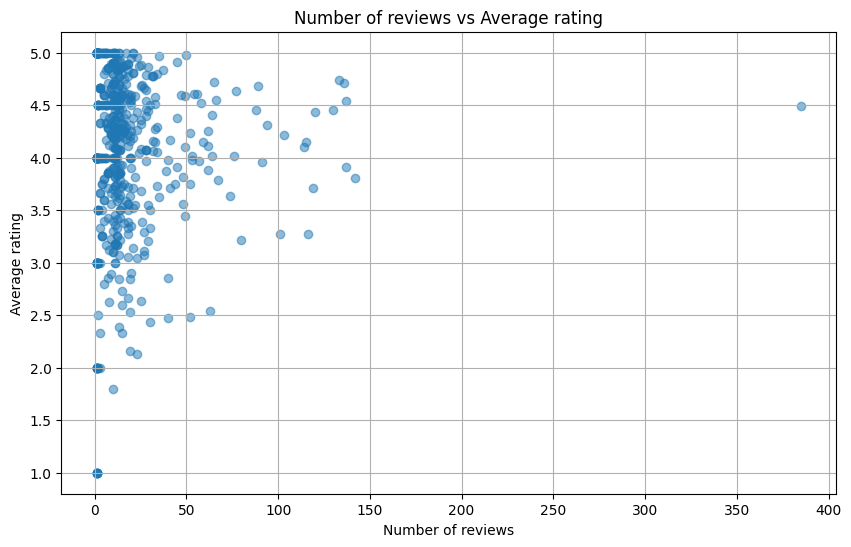

In [7]:
# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(num_books, avg_rating, alpha=0.5)
plt.xlabel("Number of reviews")
plt.ylabel("Average rating")
plt.title("Number of reviews vs Average rating")
plt.grid(True)
plt.show()

Hypotesis test to verify the hypotesis
H0: there is no evidence of a correlation between the number of reviews and the average rating
H1: there is evidence of a correlation between the number of reviews and the average rating

In [12]:
r, p_val = pearsonr(num_reviews, avg_rating)
print(f"Correlation coefficient (r): {r:.3f}")
print(f"p-value: {p_val:.5f}")

if r < 0 and p_value < 0.05:
    print("Reject H0 -> Accept H1")
else:
    print("Accept H0")

Correlation coefficient (r): 0.016
p-value: 0.71209
Accept H0


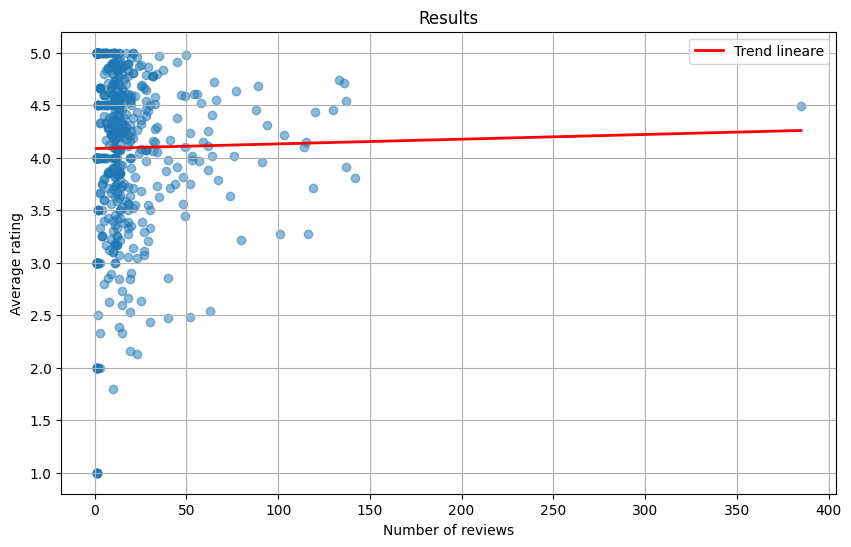

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(num_reviews, avg_rating, alpha=0.5)

# Linea di regressione
m, b = np.polyfit(num_reviews, avg_rating, 1)
plt.plot(num_reviews, m*np.array(num_reviews)+b, color='red', linewidth=2, label="Trend")

plt.xlabel("Number of reviews")
plt.ylabel("Average rating")
plt.title("Results")
plt.legend()
plt.grid(True)
plt.show()